In [2]:
cuse <- read.table("http://data.princeton.edu/wws509/datasets/cuse.dat", header=TRUE)

In [7]:
cuse

age,education,wantsMore,notUsing,using
<25,low,yes,53,6
<25,low,no,10,4
<25,high,yes,212,52
<25,high,no,50,10
25-29,low,yes,60,14
25-29,low,no,19,10
25-29,high,yes,155,54
25-29,high,no,65,27
30-39,low,yes,112,33
30-39,low,no,77,80


In [21]:
lrfit <- glm(formula=cbind(using, notUsing) ~ age+education+wantsMore, family=binomial, data=cuse)
lrfit


Call:  glm(formula = cbind(using, notUsing) ~ age + education + wantsMore, 
    family = binomial, data = cuse)

Coefficients:
 (Intercept)      age25-29      age30-39      age40-49  educationlow  
     -0.8082        0.3894        0.9086        1.1892       -0.3250  
wantsMoreyes  
     -0.8330  

Degrees of Freedom: 15 Total (i.e. Null);  10 Residual
Null Deviance:	    165.8 
Residual Deviance: 29.92 	AIC: 113.4

In [17]:
noMore <- cuse$wantsMore == "no"
hiEduc <- cuse$education == "high"

In [20]:
glm(cbind(using, notUsing) ~ age + hiEduc + noMore, family=binomial, data=cuse)


Call:  glm(formula = cbind(using, notUsing) ~ age + hiEduc + noMore, 
    family = binomial, data = cuse)

Coefficients:
(Intercept)     age25-29     age30-39     age40-49   hiEducTRUE   noMoreTRUE  
    -1.9662       0.3894       0.9086       1.1892       0.3250       0.8330  

Degrees of Freedom: 15 Total (i.e. Null);  10 Residual
Null Deviance:	    165.8 
Residual Deviance: 29.92 	AIC: 113.4

In [25]:
1-pchisq(29.92,10)

[1] 0.0008828339

In [26]:
lrfit <- glm(formula=cbind(using, notUsing) ~ age*noMore+hiEduc, family=binomial, data=cuse)
lrfit


Call:  glm(formula = cbind(using, notUsing) ~ age * noMore + hiEduc, 
    family = binomial, data = cuse)

Coefficients:
        (Intercept)             age25-29             age30-39  
           -1.80317              0.39460              0.54666  
           age40-49           noMoreTRUE           hiEducTRUE  
            0.57952              0.06622              0.34065  
age25-29:noMoreTRUE  age30-39:noMoreTRUE  age40-49:noMoreTRUE  
            0.25918              1.11266              1.36167  

Degrees of Freedom: 15 Total (i.e. Null);  7 Residual
Null Deviance:	    165.8 
Residual Deviance: 12.63 	AIC: 102.1

In [27]:
summary(lrfit)


Call:
glm(formula = cbind(using, notUsing) ~ age * noMore + hiEduc, 
    family = binomial, data = cuse)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.30027  -0.66163  -0.03286   0.81945   1.73851  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.80317    0.18018 -10.008  < 2e-16 ***
age25-29             0.39460    0.20145   1.959  0.05013 .  
age30-39             0.54666    0.19842   2.755  0.00587 ** 
age40-49             0.57952    0.34742   1.668  0.09530 .  
noMoreTRUE           0.06622    0.33071   0.200  0.84130    
hiEducTRUE           0.34065    0.12577   2.709  0.00676 ** 
age25-29:noMoreTRUE  0.25918    0.40975   0.633  0.52704    
age30-39:noMoreTRUE  1.11266    0.37404   2.975  0.00293 ** 
age40-49:noMoreTRUE  1.36167    0.48433   2.811  0.00493 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 

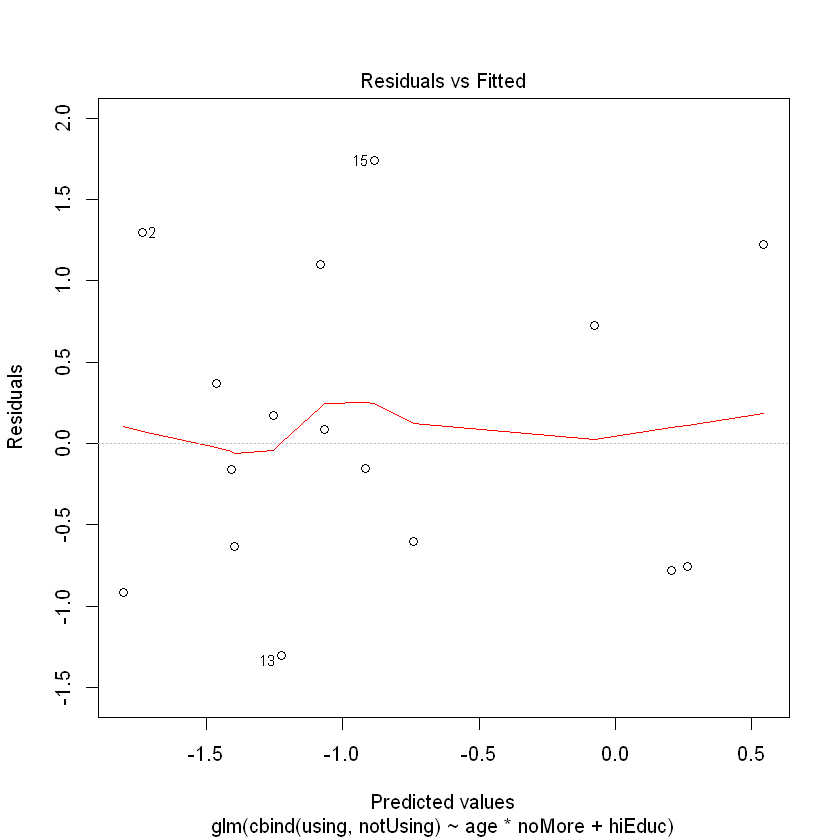

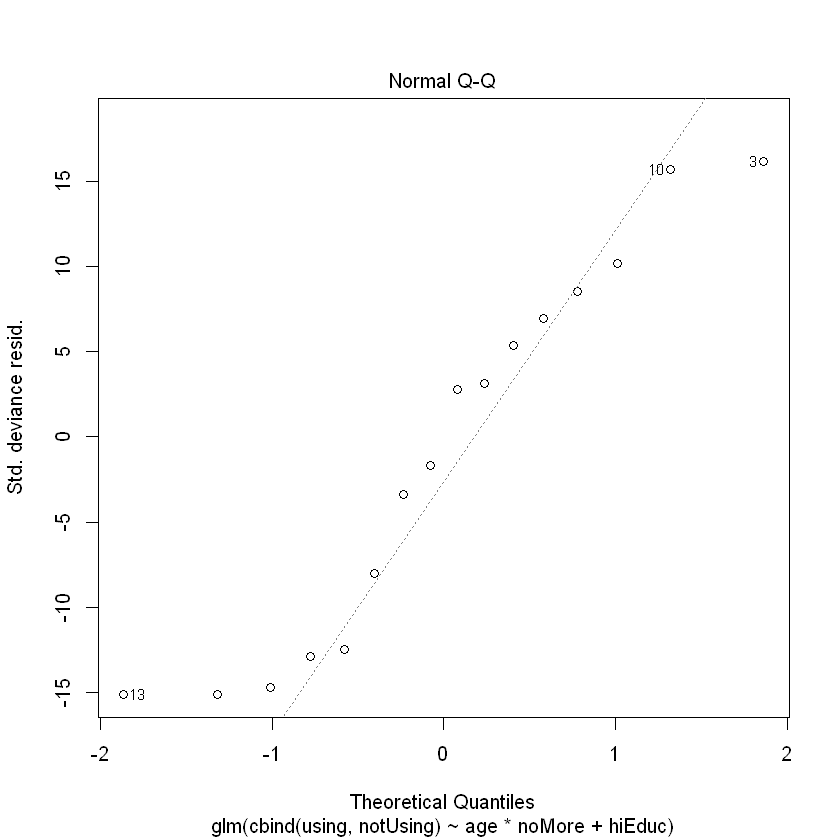

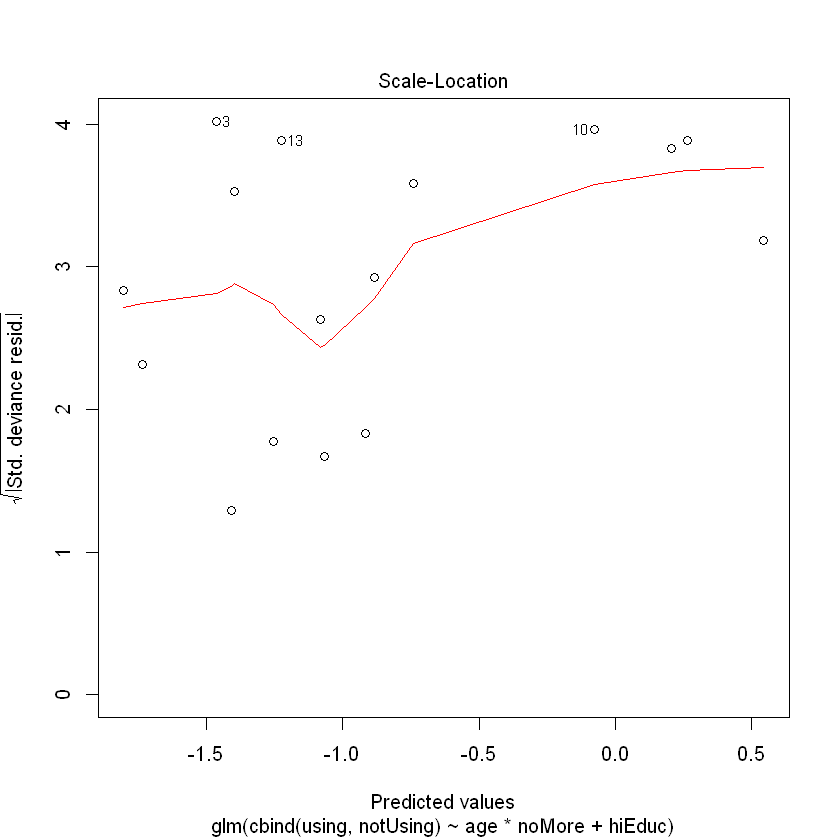

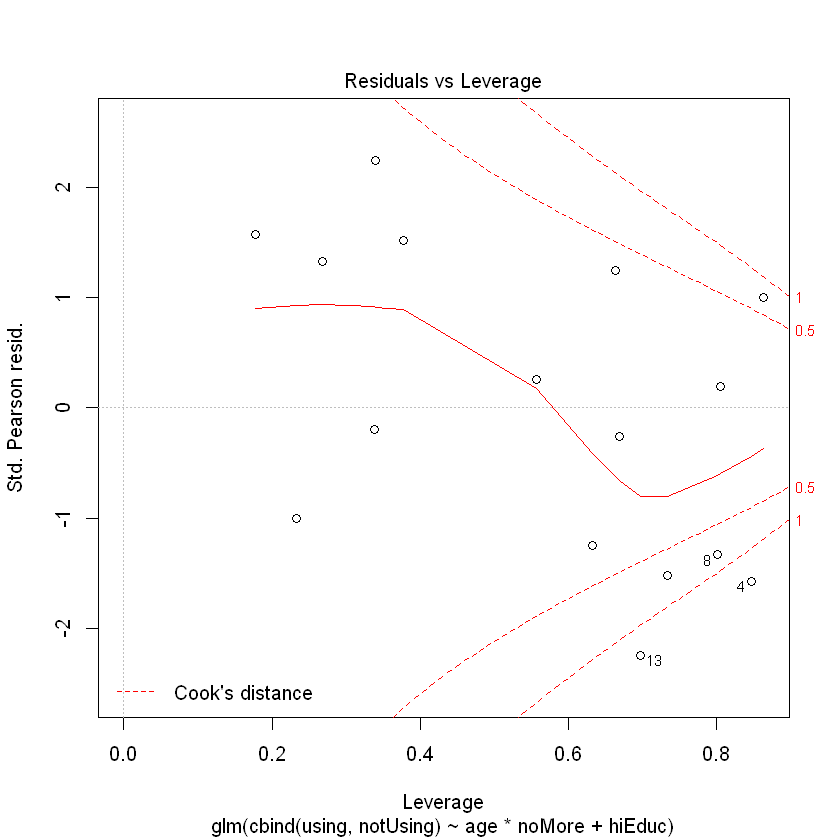

In [28]:
plot(lrfit)